In [198]:
import pandas as pd
from sqlalchemy import create_engine
import stk
from rdkit.Chem import AllChem as rdkit
from tqdm.notebook import tqdm
import sqlite3
import seaborn as sns
from pathlib import Path
from matplotlib import pyplot as plt

In [10]:
eng = create_engine("sqlite:////Volumes/Steven_HDD/Optimised_Cages/RFModelRun/Cage_Properties_RFModel.db", )
con = eng.connect()


In [145]:
eng_sa = create_engine("sqlite:////Volumes/Steven_HDD/Optimised_Cages/SAScoreRun/Cage_Properties_SAScore.db", )
con_sa = eng_sa.connect()
eng_sc = create_engine("sqlite:////Volumes/Steven_HDD/Optimised_Cages/SCScoreRun/Cage_Properties_SCScore.db", )
con_sc = eng_sc.connect()



In [202]:
pops = {
    "sascore": {
        str(x): [x, p]
        for x, p in tqdm(map(
            lambda x: (stk.ConstructedMolecule.load(str(x)), x),
            Path(
                "/Volumes/Steven_HDD/Optimised_Cages/SAScoreRun/optimisation_run_sascore/"
            ).glob("*/*.json")),
        )
    },
    "rfmodel": {
        str(x): [x, p]
        for x, p in tqdm(map(
            lambda x: (stk.ConstructedMolecule.load(str(x)), x),
            Path(
                "/Volumes/Steven_HDD/Optimised_Cages/RFModelRun/optimisation_run_rfmodel/"
            ).glob("*/*.json")),
        )
    },
    "scscore": {
        str(x): [x, p]
        for x, p in tqdm(map(
            lambda x: (stk.ConstructedMolecule.load(str(x)), x),
            Path(
                "/Volumes/Steven_HDD/Optimised_Cages/SCScoreRun/optimisation_run_scscore/"
            ).glob("*/*.json")),
        )
    },
}

In [11]:
df = pd.read_sql('cages', con=con)

In [146]:
df_sa = pd.read_sql('cages', con=con_sa)
df_sc = pd.read_sql('cages', con=con_sc)

In [154]:
df_sa_success = df_sa.dropna().sort_values(by='cavity_size', ascending=False)
df_sc_success = df_sc.dropna().sort_values(by='cavity_size', ascending=False)

In [249]:
name_key = df_success[(df_success['cavity_size'] > 4) & (df_success['cavity_size'] < 5)].sample(1)['name'].iloc[0]

In [316]:
name_key = df_success[df_success['cavity_size'] < 1.5].sample(1)['name'].iloc[0]

In [317]:
name_key

"ConstructedMolecule(building_blocks=[BuildingBlock('CC(C)(C)c1cc(C#Cc2cc(C#Cc3cc(C=O)c(O)c(C(C)(C)C)c3)cc(C#Cc3cc(C=O)c(O)c(C(C)(C)C)c3)c2)cc(C=O)c1O', ['aldehyde']), BuildingBlock('CC(C)C(N)C(=O)NC(Cc1ccccc1)C(=O)NC(CCCCN)C(=O)O', ['primary_amine'])], topology_graph=cage.FourPlusSix(vertex_alignments={0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}))"

In [324]:
df_success.iloc[0]['name']

"ConstructedMolecule(building_blocks=[BuildingBlock('O=Cc1ccc(-c2nc(-c3ccc(C=O)cc3)nc(-c3ccc(C=O)cc3)n2)cc1', ['aldehyde']), BuildingBlock('NCC(=O)NC(=O)CN', ['primary_amine'])], topology_graph=cage.FourPlusSix(vertex_alignments={0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}))"

In [429]:
for k, p in pops.items():
    if name_key in p:
        json_path = list(p[name_key].values())[0]
json_path = "/Users/stevenbennett/sshfs/stevenbennett@ch-sb2518.ch.ic.ac.uk" + str(
    json_path
).replace("/Volumes/Steven_HDD", "/HDD").replace(".json", ".mol")

In [430]:
print(json_path)

/Users/stevenbennett/sshfs/stevenbennett@ch-sb2518.ch.ic.ac.uk/HDD/Optimised_Cages/SCScoreRun/optimisation_run_scscore/chunk_16/opt_72161388741583586567360270699363418820.mol


In [415]:
smiles = [df_sc_success.sort_values(by='cavity_size', ascending=False).iloc[2]['name'].split("'")[i] for i in [1,5]]

In [416]:
smiles[0]+'.'+smiles[1]

'O=Cc1ccc(-c2nc(-c3ccc(C=O)cc3)nc(-c3ccc(C=O)cc3)n2)cc1.N#CC1(N)CCC(N)CC1'

In [428]:
name_key = df_sc_success.sort_values(by='cavity_size', ascending=False).iloc[2]['name']

In [421]:
df_sc_success.sort_values(by='cavity_size', ascending=False).iloc[2]

name            ConstructedMolecule(building_blocks=[BuildingB...
collapsed                                                   False
cavity_size                                               12.0865
max_diameter                                              35.8171
windows         [12.13667870314232, 11.848036783595054, 10.916...
window_diff                                              0.770536
window_std                                               0.550026
Name: 3978, dtype: object

In [194]:
fig, ax = plt.subplots()
sns.distplot(df_success['cavity_size'], ax=ax, hist=False, rug=True, color='green', hist_kws={'alpha':0.5}, label='RF Model')
sns.distplot(df_sa_success['cavity_size'], ax=ax, hist=False, rug=True, color='red', hist_kws={'alpha':0.5}, label='SAScore')
sns.distplot(df_sc_success['cavity_size'], ax=ax, hist=False, rug=True, color='blue', hist_kws={'alpha':0.5}, label='SCScore')
ax.set_ylabel('Density')
ax.set_xlabel('Cavity Size / Å')
ax.set_xlim(0)
ax.legend()
sns.despine()

<ipython-input-194-eeba575afe92>:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


In [263]:
collapsed_percent = [(len(df_success)/len(df))*100, (len(df_sa_success)/len(df_sa))*100, (len(df_sc_success)/len(df_sc))*100]

In [276]:
fig, ax = plt.subplots()
sns.barplot(x=['RFModel', 'SAScore', 'SCScore'], y=collapsed_percent, ax=ax)
ax.set_ylabel('Percent of cages uncollapsed')
ax.set_xlabel('Synthetic difficulty score')
sns.despine()



<ipython-input-276-0c0da5f347e2>:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


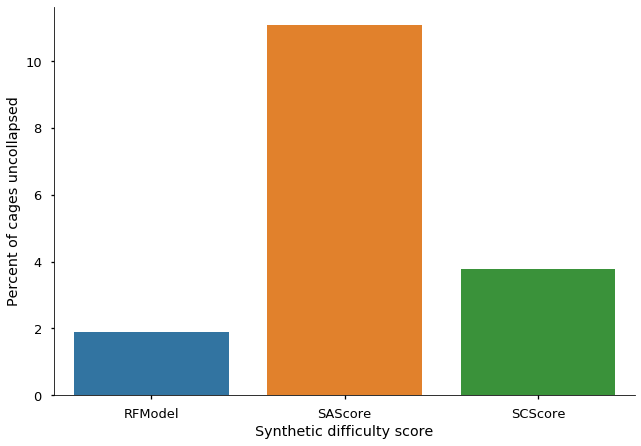

In [277]:
ax.figure

In [ ]:
cavity_size_ordered_names = df[df['collapsed'] == False].sort_values(by=['cavity_size'], ascending=False)['name'].to_list()

In [ ]:
from glob import iglob
path_gen = iglob('/Users/stevenbennett/PhD/main_projects/synthetic_accessibility_project/stages/optimisation_run_0/chunk_*/*.json')
opt_pop = {stk.ConstructedMolecule.load(p): p for p in path_gen}

In [ ]:
opt_pop_d = {str(c): c for c in opt_pop.keys()}

In [ ]:
cavity_index = 0
print(opt_pop[opt_pop_d[cavity_size_ordered_names[cavity_index]]])
list(opt_pop_d[cavity_size_ordered_names[cavity_index]].get_building_blocks())

In [437]:
eng = create_engine("sqlite:///cage_prediction.db", )
con = eng.connect()

In [438]:
df = pd.read_sql('cages', con=con)

In [448]:
len(df[df['collapsed']==True])

4697

In [449]:
len(df[df['collapsed'] == False])

245

In [450]:
len(df)

5156

In [443]:
import sys

In [ ]:
sys.path.append('/Users/stevenbennett/PhD/main_projects/cage_prediction_ml/')

In [ ]:
from cage_prediction import predict_cage_collapse
import joblib
model = joblib.load('/Users/stevenbennett/PhD/main_projects/cage_prediction_ml/utilities/trained_models/amine2aldehyde3.pkl')

In [ ]:
sort_fgs = lambda bb: 1 if bb.func_groups[0].fg_type.name == "aldehyde" else 0
all_d = {
    query(cage): 1.0-float(
        predict_cage_collapse(
            [
                bb.to_rdkit_mol()
                for bb in sorted(
                    cage.get_building_blocks(), key=sort_fgs, reverse=False
                )
            ],
            model,
        )["collapse_probability"]
    )
    for cage in all_stk_cages
}

In [ ]:
all_d_remove_h = {
    query(cage): float(
        predict_cage_collapse(
            [
                rdkit.RemoveHs(bb.to_rdkit_mol())
                for bb in sorted(
                    cage.get_building_blocks(), key=sort_fgs, reverse=False
                )
            ],
            model,
        )["collapse_probability"]
    )
    for cage in all_stk_cages
}

In [ ]:
d_convert = {query(opt_pop_d[n]):opt_pop_d[n] for n in df['name']}

In [ ]:
predict_cage_collapse([rdkit.MolFromSmiles('NCCN'), rdkit.MolFromSmiles('O=CC1=CC(C=O)=CC(C=O)=C1')], model)

In [ ]:
for i in (d := {query(opt_pop_d[name]): all_d_remove_h[query(opt_pop_d[name])] for name in df[df['collapsed'] == False]['name']}):
    if i in collapsed_results_converted:
        print(all_d_remove_h[i])
        print(collapsed_results_converted[i])
        assert(float(all_d_remove_h[i]) == float(collapsed_results_converted[i]))

In [ ]:
{query(opt_pop_d[name]): all_d[query(opt_pop_d[name])] for name in df[df['collapsed'] == False]['name']}

In [ ]:
sorted(collapsed_d.items(), key=lambda x: x[0], reverse=True)

In [ ]:
# Checking JSON results
import json
collapse_results = []
for p in iglob("/Users/stevenbennett/PhD/main_projects/cage_prediction_ml/results_filtered_amines2aldehydes3/*.json"):
    with open(p) as f:
        collapse_results.append(json.load(f))

In [ ]:
def query(c):
    q = ""
    for idx, bb in enumerate(sorted(c.get_building_blocks(), key=sort_fgs)):
        mol = bb.to_rdkit_mol()
        mol = rdkit.RemoveHs(mol)
        rdkit.SanitizeMol(mol)
        rdkit.Kekulize(mol)
        q += rdkit.MolToSmiles(mol, canonical=True,)
        if idx == 0:
            q += " "
    return q

In [ ]:
query(uncollapsed_stk_cages[5])

In [ ]:
collapsed_results_converted = {
    f"{r['smiles_1']} {r['smiles_2']}": r["collapse_probability"]
    for i in collapsed_results_flat
    for r in i
}

In [ ]:
collapsed_results_converted = {
    f"{rdkit.MolToInchiKey(rdkit.MolFromSmiles(r['smiles_1']))} {rdkit.MolToInchiKey(rdkit.MolFromSmiles(r['smiles_2']))}": r[
        "collapse_probability"
    ]
    for i in tqdm(collapsed_results_flat)
    for r in i
}

In [ ]:
query(uncollapsed_stk_cages[5]) in collapsed_results_converted

In [ ]:
collapsed_results_converted[query(uncollapsed_stk_cages[118])]

In [ ]:
collapsed_d